<a href="https://colab.research.google.com/github/ZahraDehghani99/Heart-Disease-Health-Indicators-Dataset/blob/main/heart_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Classification

## Read data and EDA

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !cd /content/drive/MyDrive/ML_Dr.sajedi/final_proj
# !unzip -q archive.zip

### Data Description
In this notebook, we want to do binary classification. We want to recognize a person has heart disease(1) or not(0) based on some health indicators.

These data are extracted from original data from CDC (centers for disease control and prevention) whose name is [BRFSS](https://www.kaggle.com/cdc/behavioral-risk-factor-surveillance-system) (behavioral risk factor surveillance system) which consists of 441456 rows and 330 columns. We worked with the cleaned BRFSS version which consists of 22 columns. 

In this data, `HeartDiseaseorAttack` is a target variable and other columns are feature variables.





| Categorical Features      |  Numerical Features    |
| --------------------------| ------------------     |
|  HighBP                   |      BMI              |
|  HighChol                 |      MentHlth         |
|  CholCheck                |      PhysHlth         |
|  Smoker  
|  Stroke
| Diabetes 	
|  PhysActivity 	
|  Fruits 	
|  Veggies 	
|  HvyAlcoholConsump 	
|  AnyHealthcare 	
| NoDocbcCost (no doctor because of cost)	
| GenHlth (1 excellent and 5 poor)      (ordinalvariable)       
|DiffWalk                 
| Sex                      
|  Age    (ordinal variable)                 
|  Education               (ordinal variable)         
|  Income                   (ordinal variable)



In [3]:
DATA_PATH = '/content/drive/MyDrive/ML_Dr.sajedi/final_proj/heart_disease_health_indicators_BRFSS2015.csv'
df = pd.read_csv(DATA_PATH)
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
print(f'data shape : {df.shape}')

data shape : (253680, 22)


In [5]:
print(f'data columns type : \n{df.dtypes}')

data columns type : 
HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


In [6]:
print(f'number of unique values in each column : \n{df.nunique()}')

number of unique values in each column : 
HeartDiseaseorAttack     2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
Diabetes                 3
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64


As you can see MentHlth has 31 unique values.

In [7]:
print(f'unique values of MentHlth : {df.MentHlth.unique()}')

unique values of MentHlth : [18.  0. 30.  3.  5. 15. 10.  6. 20.  2. 25.  1.  4.  7.  8. 21. 14. 26.
 29. 16. 28. 11. 12. 24. 17. 13. 27. 19. 22.  9. 23.]


Let's check for missing values in our data.

In [9]:
print(f'number of null values in data : {df.isnull().sum().sum()}')

number of null values in data : 0


In [10]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### Correlation matrix

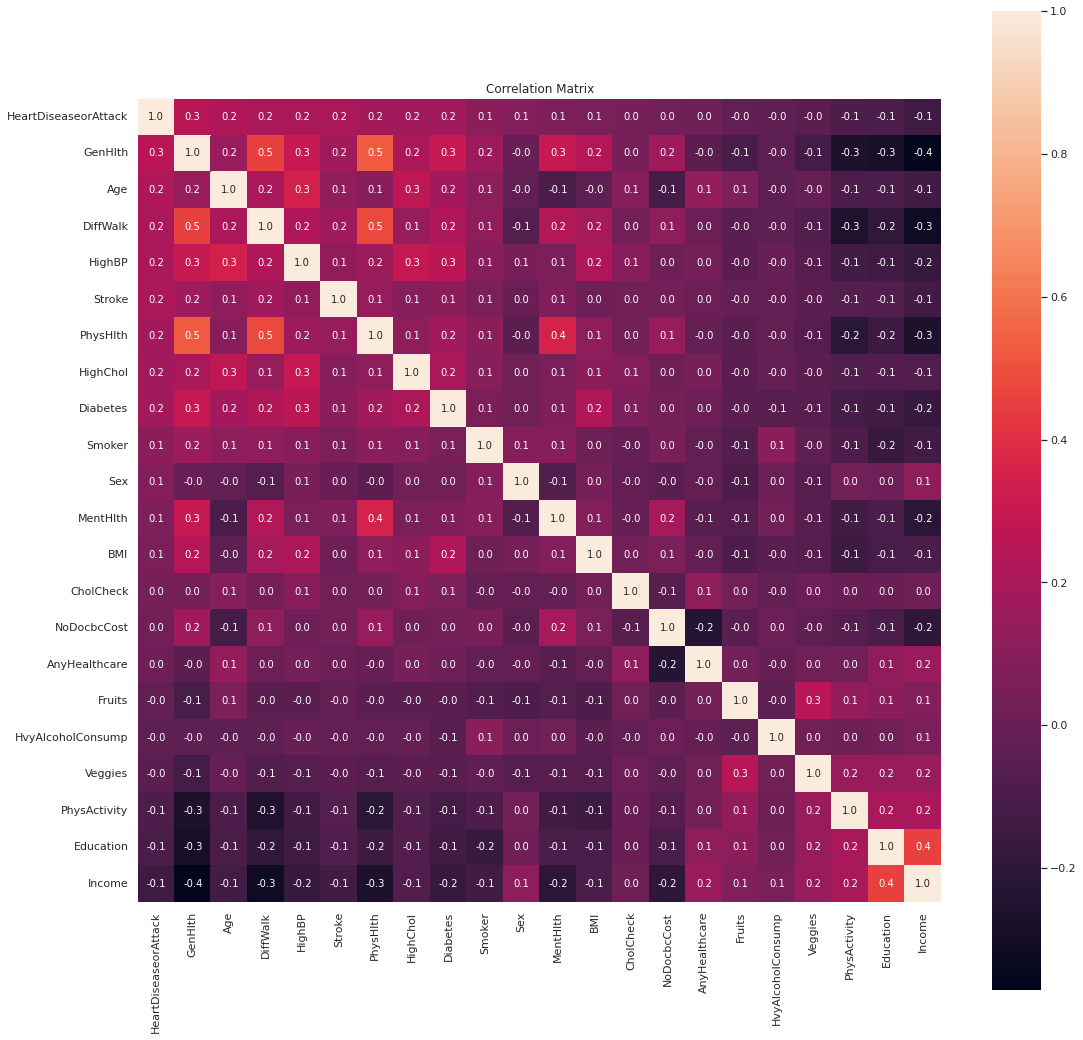

In [14]:
# correlation matrix
correlation_matrix = df.corr()
k = 22 # number of variables for heatmap
cols = correlation_matrix.nlargest(k,'HeartDiseaseorAttack')['HeartDiseaseorAttack'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(18,18))  # Sample figsize in inches
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.01f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,ax=ax)
plt.title("Correlation Matrix")
plt.show()

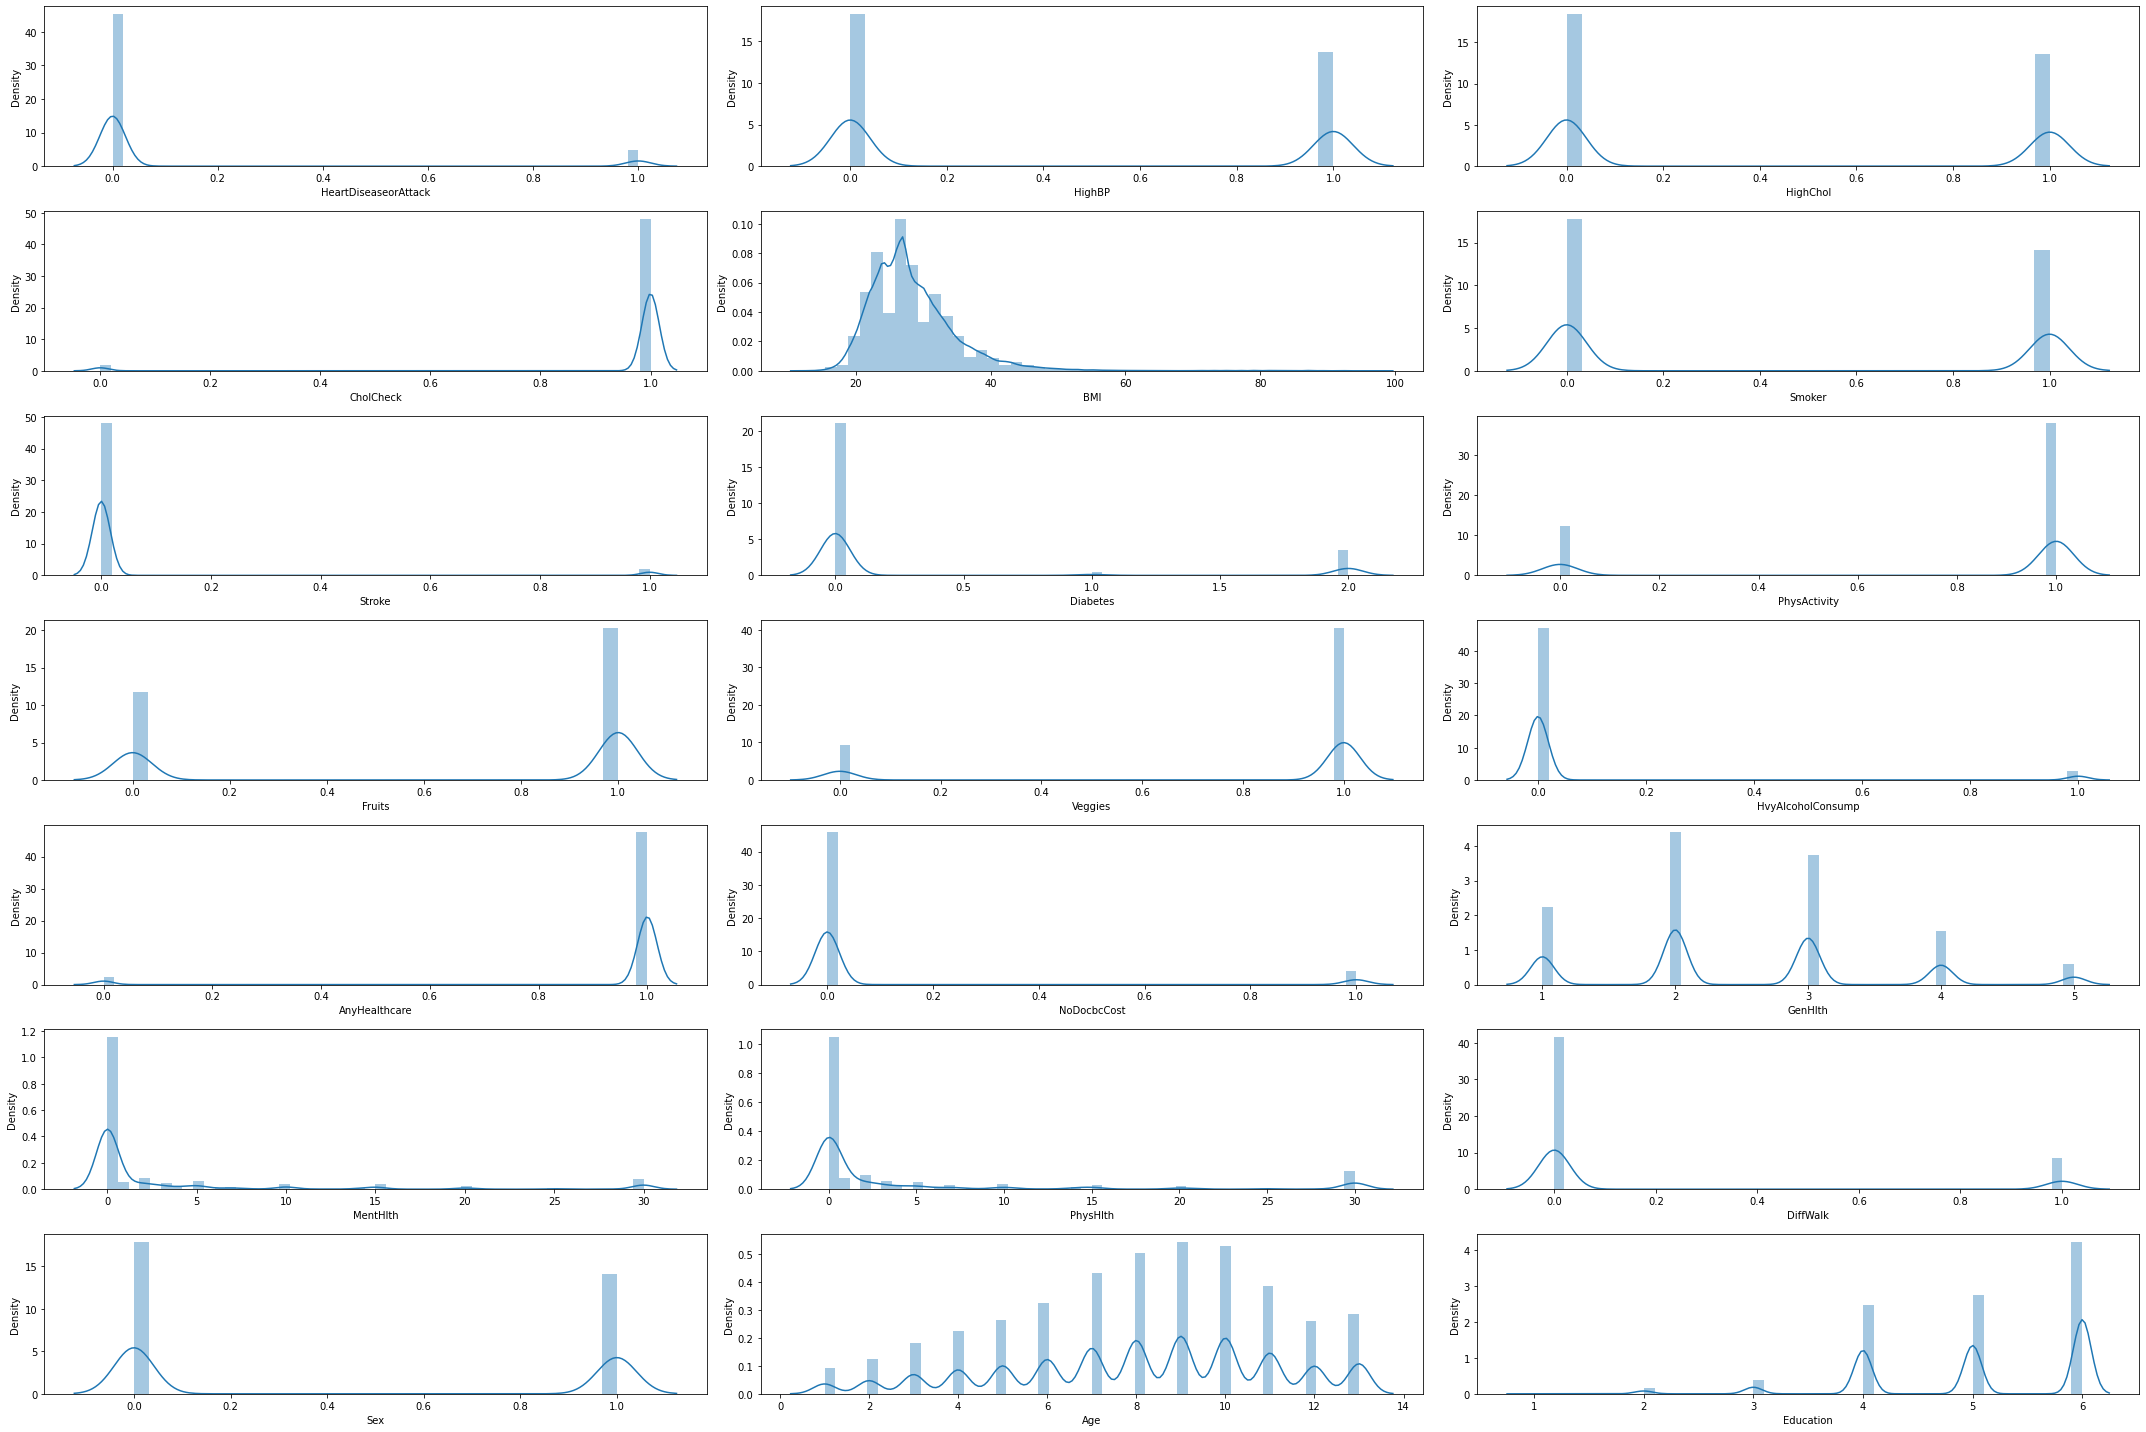

In [21]:
# # distribution of first 16 features
# fig, axs = plt.subplots(nrows=7, ncols=3, figsize=(30, 20))
# axs = axs.flatten()
# index = 0
# for k, v in df.items():
#   sns.distplot(v, ax=axs[index])
#   index += 1
#   if index == 21:
#     break 
# plt.tight_layout()

### Split X and y

In [16]:
X = df.drop(columns='HeartDiseaseorAttack')
y = pd.DataFrame(df['HeartDiseaseorAttack'])

print(f'X shape : {X.shape}')
print(f'y shape : {y.shape}')

X shape : (253680, 21)
y shape : (253680, 1)


Let's take a look at target value distribution.

In [17]:
y.value_counts()

HeartDiseaseorAttack
0.0                     229787
1.0                      23893
dtype: int64

In [ ]:


data["target"] = [1 if i == 1.0 else 0 for i in data.target]



As we can see, we have imbalanced dataset.

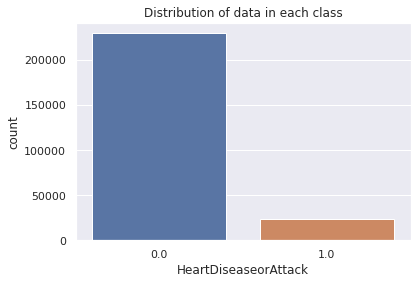

In [33]:
# distribution of data in each class
sns.countplot(x="HeartDiseaseorAttack", data=y)
plt.title("Distribution of data in each class")
plt.show()

### Split train and test set

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (202944, 21)
X_test shape: (50736, 21)
y_train shape: (202944, 1)
y_test shape: (50736, 1)


### Standardization

Let's standardize only numerical columns.

In [20]:
from sklearn.preprocessing import StandardScaler

num_cols = ["BMI", "MentHlth", "PhysHlth"]
sc = StandardScaler()
X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_test[num_cols] = sc.transform(X_test[num_cols])

In [41]:
X_train.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
87895,1.0,1.0,1.0,-0.208905,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,-0.159934,-0.371520,0.0,0.0,13.0,5.0,2.0
182101,1.0,1.0,1.0,-0.511433,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,-0.429641,-0.486428,0.0,0.0,10.0,6.0,7.0
32491,0.0,0.0,1.0,-0.662698,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,-0.429641,-0.486428,0.0,1.0,7.0,4.0,7.0
54416,1.0,1.0,1.0,-0.662698,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,-0.429641,2.960806,1.0,0.0,11.0,4.0,4.0
118742,0.0,0.0,1.0,-1.267755,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,1.593160,-0.486428,0.0,0.0,2.0,6.0,6.0


## BaseLine model

Let's construct baseline model. Since data with class =1 are more that data with class =0 in our dataset and we have imbalanced dataset, so we can construct baseline model that predicts all of the inputs as class = 1

In [38]:
def baseline(X):
  y_pred = []
  for i in range(len(X)):
    y_pred.append(0)
  return y_pred

def confusion_matrix(y_test, y_pred):
    df_cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), index = [0, 1],
                  columns = [0, 1])
    sns.heatmap(df_cm, annot=True, cmap="YlGnBu" ,fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

In [39]:
y_pred = baseline(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     45957
         1.0       0.00      0.00      0.00      4779

    accuracy                           0.91     50736
   macro avg       0.45      0.50      0.48     50736
weighted avg       0.82      0.91      0.86     50736



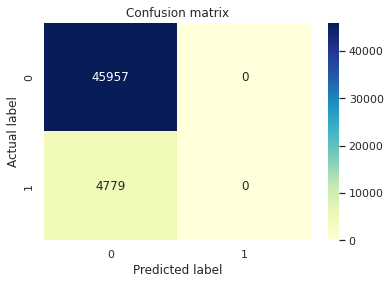

In [40]:
confusion_matrix(y_test, y_pred)

using autoencoder for understanding structure of healthy people, or doing upsampling or downsampling.

## MLP classification

## AutoEncoder